# **MarePiù - an analysis of B2C market opportunities**

... introduction ... 

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from scipy import stats
from statsmodels.stats import weightstats as st
import numpy as np
import seaborn as sns
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.metrics import silhouette_score

## **1 - Data loading and description**

For segmentation purposes, we developed a survey asking demographic data, purchasing habits and importance ratings regarding fish market. We concluded with a total of **347 respondents** and **28 questions**.

The dataset consists of 347 rows and 28 columns, each representing a specific question from the survey.

In [3]:
raw_data = pd.read_csv('data_1.csv')
raw_data.head()

,Informazioni cronologiche,Qual è la tua età?,In che regione vivi?,In che zona abiti?,Con quale genere ti identifichi?,Da quanti componenti è formato il tuo nucleo familiare?,Qual è la tua professione?,Consumi prodotti ittici?,Per quale motivo non consumi prodotti ittici?,Quanto spesso consumi prodotti ittici?,...,"Da 1 a 5, quanto sono importanti per te le seguenti caratteristiche? [La velocità di preparazione]","Da 1 a 5, quanto sono importanti per te le seguenti caratteristiche? [La semplicità di preparazione]","Da 1 a 5, quanto sono importanti per te le seguenti caratteristiche? [Il bilancio nutrizionale del prodotto]","Da 1 a 5, quanto sono importanti per te le seguenti caratteristiche? [La presenza di prodotti nuovi/innovativi]","Da 1 a 5, quanto sono importanti per te le seguenti caratteristiche? [Che il prodotto sia al naturale/poco lavorato]","Da 1 a 5, quanto sono importanti per te le seguenti caratteristiche? [Il prezzo]","Da 1 a 5, quanto sono importanti per te le seguenti caratteristiche? [La presenza di prodotti monoporzione]","Da 1 a 5, quanto sono importanti per te le seguenti caratteristiche in termini di sostenibilità? [La provenienza da fonti sostenibili degli ingredienti (es. pesca certificata)]","Da 1 a 5, quanto sono importanti per te le seguenti caratteristiche in termini di sostenibilità? [Il basso impatto ambientale della produzione]","Da 1 a 5, quanto sono importanti per te le seguenti caratteristiche in termini di sostenibilità? [Il packaging eco-sostenibile ]"
0,2024/11/24 11:38:10 AM CET,18-25 anni,Lombardia,Centro città,Uomo,4+,Studente,Si,NaN,Una volta a settimana,...,3 - Mediamente importante,2 - Poco importante,4 - Abbastanza importante,1 - Non mi interessa,2 - Poco importante,5 - Molto importante,2 - Poco importante,5 - Molto importante,4 - Abbastanza importante,4 - Abbastanza importante
1,2024/11/24 11:39:37 AM CET,18-25 anni,Lombardia,Centro città,Uomo,2-3,Lavoratore,Si,NaN,Una volta a settimana,...,4 - Abbastanza importante,4 - Abbastanza importante,3 - Mediamente importante,2 - Poco importante,4 - Abbastanza importante,4 - Abbastanza importante,4 - Abbastanza importante,5 - Molto importante,5 - Molto importante,5 - Molto importante
2,2024/11/24 11:39:51 AM CET,18-25 anni,Veneto,Centro città,Donna,1,Studente,Si,NaN,Una volta a settimana,...,3 - Mediamente importante,2 - Poco importante,5 - Molto importante,2 - Poco importante,3 - Mediamente importante,4 - Abbastanza importante,4 - Abbastanza importante,3 - Mediamente importante,3 - Mediamente importante,3 - Mediamente importante
3,2024/11/24 11:48:20 AM CET,26-35 anni,Lombardia,Periferia città,Donna,2-3,Lavoratore,Si,NaN,Una o due volte al mese,...,2 - Poco importante,3 - Mediamente importante,4 - Abbastanza importante,1 - Non mi interessa,5 - Molto importante,4 - Abbastanza importante,1 - Non mi interessa,3 - Mediamente importante,3 - Mediamente importante,3 - Mediamente importante
4,2024/11/24 11:49:38 AM CET,60-70 anni,Lombardia,Esterno (es. campagna/costiera/montagna...),Donna,1,Lavoratore,Si,NaN,Una o due volte al mese,...,5 - Molto importante,5 - Molto importante,4 - Abbastanza importante,2 - Poco importante,5 - Molto importante,5 - Molto importante,5 - Molto importante,5 - Molto importante,5 - Molto importante,5 - Molto importante


One of the first questions of the survey was 'Do you consume fish products?'. If respondent answered with 'NO', he was directed to a final part of the survey asking motivations and opportunities. For segmentation analysis, we **filtered data to include only respondents who consume seafood products**.

In [4]:
data = raw_data[raw_data['Consumi prodotti ittici?']=='Si']
data.head()

,Informazioni cronologiche,Qual è la tua età?,In che regione vivi?,In che zona abiti?,Con quale genere ti identifichi?,Da quanti componenti è formato il tuo nucleo familiare?,Qual è la tua professione?,Consumi prodotti ittici?,Per quale motivo non consumi prodotti ittici?,Quanto spesso consumi prodotti ittici?,...,"Da 1 a 5, quanto sono importanti per te le seguenti caratteristiche? [La velocità di preparazione]","Da 1 a 5, quanto sono importanti per te le seguenti caratteristiche? [La semplicità di preparazione]","Da 1 a 5, quanto sono importanti per te le seguenti caratteristiche? [Il bilancio nutrizionale del prodotto]","Da 1 a 5, quanto sono importanti per te le seguenti caratteristiche? [La presenza di prodotti nuovi/innovativi]","Da 1 a 5, quanto sono importanti per te le seguenti caratteristiche? [Che il prodotto sia al naturale/poco lavorato]","Da 1 a 5, quanto sono importanti per te le seguenti caratteristiche? [Il prezzo]","Da 1 a 5, quanto sono importanti per te le seguenti caratteristiche? [La presenza di prodotti monoporzione]","Da 1 a 5, quanto sono importanti per te le seguenti caratteristiche in termini di sostenibilità? [La provenienza da fonti sostenibili degli ingredienti (es. pesca certificata)]","Da 1 a 5, quanto sono importanti per te le seguenti caratteristiche in termini di sostenibilità? [Il basso impatto ambientale della produzione]","Da 1 a 5, quanto sono importanti per te le seguenti caratteristiche in termini di sostenibilità? [Il packaging eco-sostenibile ]"
0,2024/11/24 11:38:10 AM CET,18-25 anni,Lombardia,Centro città,Uomo,4+,Studente,Si,NaN,Una volta a settimana,...,3 - Mediamente importante,2 - Poco importante,4 - Abbastanza importante,1 - Non mi interessa,2 - Poco importante,5 - Molto importante,2 - Poco importante,5 - Molto importante,4 - Abbastanza importante,4 - Abbastanza importante
1,2024/11/24 11:39:37 AM CET,18-25 anni,Lombardia,Centro città,Uomo,2-3,Lavoratore,Si,NaN,Una volta a settimana,...,4 - Abbastanza importante,4 - Abbastanza importante,3 - Mediamente importante,2 - Poco importante,4 - Abbastanza importante,4 - Abbastanza importante,4 - Abbastanza importante,5 - Molto importante,5 - Molto importante,5 - Molto importante
2,2024/11/24 11:39:51 AM CET,18-25 anni,Veneto,Centro città,Donna,1,Studente,Si,NaN,Una volta a settimana,...,3 - Mediamente importante,2 - Poco importante,5 - Molto importante,2 - Poco importante,3 - Mediamente importante,4 - Abbastanza importante,4 - Abbastanza importante,3 - Mediamente importante,3 - Mediamente importante,3 - Mediamente importante
3,2024/11/24 11:48:20 AM CET,26-35 anni,Lombardia,Periferia città,Donna,2-3,Lavoratore,Si,NaN,Una o due volte al mese,...,2 - Poco importante,3 - Mediamente importante,4 - Abbastanza importante,1 - Non mi interessa,5 - Molto importante,4 - Abbastanza importante,1 - Non mi interessa,3 - Mediamente importante,3 - Mediamente importante,3 - Mediamente importante
4,2024/11/24 11:49:38 AM CET,60-70 anni,Lombardia,Esterno (es. campagna/costiera/montagna...),Donna,1,Lavoratore,Si,NaN,Una o due volte al mese,...,5 - Molto importante,5 - Molto importante,4 - Abbastanza importante,2 - Poco importante,5 - Molto importante,5 - Molto importante,5 - Molto importante,5 - Molto importante,5 - Molto importante,5 - Molto importante


In [5]:
len(data)

308

Only a small part of our respondents (39) don't consume fish products.

To conclude data pre-processing, we set an **index column** corresponding to ID of respondent.

In [6]:
# Set the 'respondent_id' column as the index
data['respondent_id'] = data.index
data = data.set_index('respondent_id')
data.head()

/var/folders/mx/tjch5_wj6jb11_qwfd_w7ysr0000gn/T/ipykernel_39389/451653746.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['respondent_id'] = data.index


,Informazioni cronologiche,Qual è la tua età?,In che regione vivi?,In che zona abiti?,Con quale genere ti identifichi?,Da quanti componenti è formato il tuo nucleo familiare?,Qual è la tua professione?,Consumi prodotti ittici?,Per quale motivo non consumi prodotti ittici?,Quanto spesso consumi prodotti ittici?,...,"Da 1 a 5, quanto sono importanti per te le seguenti caratteristiche? [La velocità di preparazione]","Da 1 a 5, quanto sono importanti per te le seguenti caratteristiche? [La semplicità di preparazione]","Da 1 a 5, quanto sono importanti per te le seguenti caratteristiche? [Il bilancio nutrizionale del prodotto]","Da 1 a 5, quanto sono importanti per te le seguenti caratteristiche? [La presenza di prodotti nuovi/innovativi]","Da 1 a 5, quanto sono importanti per te le seguenti caratteristiche? [Che il prodotto sia al naturale/poco lavorato]","Da 1 a 5, quanto sono importanti per te le seguenti caratteristiche? [Il prezzo]","Da 1 a 5, quanto sono importanti per te le seguenti caratteristiche? [La presenza di prodotti monoporzione]","Da 1 a 5, quanto sono importanti per te le seguenti caratteristiche in termini di sostenibilità? [La provenienza da fonti sostenibili degli ingredienti (es. pesca certificata)]","Da 1 a 5, quanto sono importanti per te le seguenti caratteristiche in termini di sostenibilità? [Il basso impatto ambientale della produzione]","Da 1 a 5, quanto sono importanti per te le seguenti caratteristiche in termini di sostenibilità? [Il packaging eco-sostenibile ]"
respondent_id,,,,,,,,,,,,,,,,,,,,,
0,2024/11/24 11:38:10 AM CET,18-25 anni,Lombardia,Centro città,Uomo,4+,Studente,Si,NaN,Una volta a settimana,...,3 - Mediamente importante,2 - Poco importante,4 - Abbastanza importante,1 - Non mi interessa,2 - Poco importante,5 - Molto importante,2 - Poco importante,5 - Molto importante,4 - Abbastanza importante,4 - Abbastanza importante
1,2024/11/24 11:39:37 AM CET,18-25 anni,Lombardia,Centro città,Uomo,2-3,Lavoratore,Si,NaN,Una volta a settimana,...,4 - Abbastanza importante,4 - Abbastanza importante,3 - Mediamente importante,2 - Poco importante,4 - Abbastanza importante,4 - Abbastanza importante,4 - Abbastanza importante,5 - Molto importante,5 - Molto importante,5 - Molto importante
2,2024/11/24 11:39:51 AM CET,18-25 anni,Veneto,Centro città,Donna,1,Studente,Si,NaN,Una volta a settimana,...,3 - Mediamente importante,2 - Poco importante,5 - Molto importante,2 - Poco importante,3 - Mediamente importante,4 - Abbastanza importante,4 - Abbastanza importante,3 - Mediamente importante,3 - Mediamente importante,3 - Mediamente importante
3,2024/11/24 11:48:20 AM CET,26-35 anni,Lombardia,Periferia città,Donna,2-3,Lavoratore,Si,NaN,Una o due volte al mese,...,2 - Poco importante,3 - Mediamente importante,4 - Abbastanza importante,1 - Non mi interessa,5 - Molto importante,4 - Abbastanza importante,1 - Non mi interessa,3 - Mediamente importante,3 - Mediamente importante,3 - Mediamente importante
4,2024/11/24 11:49:38 AM CET,60-70 anni,Lombardia,Esterno (es. campagna/costiera/montagna...),Donna,1,Lavoratore,Si,NaN,Una o due volte al mese,...,5 - Molto importante,5 - Molto importante,4 - Abbastanza importante,2 - Poco importante,5 - Molto importante,5 - Molto importante,5 - Molto importante,5 - Molto importante,5 - Molto importante,5 - Molto importante


## **2 - Segmentation**

### **2.1. Data**
The dataframe "_segmentation_data_" consists of a selection of columns (17 to 28) from the original dataset. They contain the importance ratings assigned from each respondent to various product characteristics. The attributes we decided to take into account are the following:
- **freshness**: importance of the freshness of the purchased product.
- **origin**: importance of the origin of the raw materials.
- **cooking_speed**: importance of the speed of preparation.
- **cooking_simplicity**: importance of the simplicity of preparation.
- **nutritional_balance**: importance of the nutritional balance of the product.
- **innovative_products**: importance of the presence of new/innovative products.
- **unprocessed**: importance of the product being natural/minimally processed.
- **price**: importance of the price.
- **single_portion**: importance of the availability of single-portion products.
- **sustainable_sources**: importance of the ingredients coming from sustainable sources (e.g., certified fishing).
- **low_impact_environment**: importance of low environmental impact in production.
- **sustainable_packaging**: importance of eco-friendly packaging.

The responses range from 1 to 5, where 1 represents "Not interested" and 5 represents "Very important".

In [7]:
segmentation_data = data.iloc[:, 16:28]
segmentation_data

,"Da 1 a 5, quanto sono importanti per te le seguenti caratteristiche? [La freschezza del prodotto acquistato]","Da 1 a 5, quanto sono importanti per te le seguenti caratteristiche? [La provenienza della materia prima]","Da 1 a 5, quanto sono importanti per te le seguenti caratteristiche? [La velocità di preparazione]","Da 1 a 5, quanto sono importanti per te le seguenti caratteristiche? [La semplicità di preparazione]","Da 1 a 5, quanto sono importanti per te le seguenti caratteristiche? [Il bilancio nutrizionale del prodotto]","Da 1 a 5, quanto sono importanti per te le seguenti caratteristiche? [La presenza di prodotti nuovi/innovativi]","Da 1 a 5, quanto sono importanti per te le seguenti caratteristiche? [Che il prodotto sia al naturale/poco lavorato]","Da 1 a 5, quanto sono importanti per te le seguenti caratteristiche? [Il prezzo]","Da 1 a 5, quanto sono importanti per te le seguenti caratteristiche? [La presenza di prodotti monoporzione]","Da 1 a 5, quanto sono importanti per te le seguenti caratteristiche in termini di sostenibilità? [La provenienza da fonti sostenibili degli ingredienti (es. pesca certificata)]","Da 1 a 5, quanto sono importanti per te le seguenti caratteristiche in termini di sostenibilità? [Il basso impatto ambientale della produzione]","Da 1 a 5, quanto sono importanti per te le seguenti caratteristiche in termini di sostenibilità? [Il packaging eco-sostenibile ]"
respondent_id,,,,,,,,,,,,
0,4 - Abbastanza importante,3 - Mediamente importante,3 - Mediamente importante,2 - Poco importante,4 - Abbastanza importante,1 - Non mi interessa,2 - Poco importante,5 - Molto importante,2 - Poco importante,5 - Molto importante,4 - Abbastanza importante,4 - Abbastanza importante
1,5 - Molto importante,3 - Mediamente importante,4 - Abbastanza importante,4 - Abbastanza importante,3 - Mediamente importante,2 - Poco importante,4 - Abbastanza importante,4 - Abbastanza importante,4 - Abbastanza importante,5 - Molto importante,5 - Molto importante,5 - Molto importante
2,5 - Molto importante,4 - Abbastanza importante,3 - Mediamente importante,2 - Poco importante,5 - Molto importante,2 - Poco importante,3 - Mediamente importante,4 - Abbastanza importante,4 - Abbastanza importante,3 - Mediamente importante,3 - Mediamente importante,3 - Mediamente importante
3,5 - Molto importante,3 - Mediamente importante,2 - Poco importante,3 - Mediamente importante,4 - Abbastanza importante,1 - Non mi interessa,5 - Molto importante,4 - Abbastanza importante,1 - Non mi interessa,3 - Mediamente importante,3 - Mediamente importante,3 - Mediamente importante
4,5 - Molto importante,5 - Molto importante,5 - Molto importante,5 - Molto importante,4 - Abbastanza importante,2 - Poco importante,5 - Molto importante,5 - Molto importante,5 - Molto importante,5 - Molto importante,5 - Molto importante,5 - Molto importante
...,...,...,...,...,...,...,...,...,...,...,...,...
341,5 - Molto importante,5 - Molto importante,3 - Mediamente importante,3 - Mediamente importante,5 - Molto importante,5 - Molto importante,4 - Abbastanza importante,5 - Molto importante,4 - Abbastanza importante,4 - Abbastanza importante,4 - Abbastanza importante,5 - Molto importante
342,4 - Abbastanza importante,3 - Mediamente importante,1 - Non mi interessa,1 - Non mi interessa,1 - Non mi interessa,2 - Poco importante,4 - Abbastanza importante,5 - Molto importante,3 - Mediamente importante,4 - Abbastanza importante,4 - Abbastanza importante,4 - Abbastanza importante
343,1 - Non mi interessa,1 - Non mi interessa,5 - Molto importante,5 - Molto importante,1 - Non mi interessa,1 - Non mi interessa,1 - Non mi interessa,5 - Molto importante,5 - Molto importante,1 - Non mi interessa,1 - Non mi interessa,1 - Non mi interessa


Next, we renamed columns with pre-specified and easier **column names** and mapped cell values to integers.

In [8]:
# rename columns
new_names = { 'Da 1 a 5, quanto sono importanti per te le seguenti caratteristiche? [La freschezza del prodotto acquistato]' : 'freshness',
       'Da 1 a 5, quanto sono importanti per te le seguenti caratteristiche? [La provenienza della materia prima]': 'origin',
       'Da 1 a 5, quanto sono importanti per te le seguenti caratteristiche? [La velocità di preparazione]' : 'cooking_speed',
       'Da 1 a 5, quanto sono importanti per te le seguenti caratteristiche? [La semplicità di preparazione]' : 'cooking_simplicity',
       'Da 1 a 5, quanto sono importanti per te le seguenti caratteristiche? [Il bilancio nutrizionale del prodotto]' : 'nutritional_balance',
       'Da 1 a 5, quanto sono importanti per te le seguenti caratteristiche? [La presenza di prodotti nuovi/innovativi]': 'innovative_products',
       'Da 1 a 5, quanto sono importanti per te le seguenti caratteristiche? [Che il prodotto sia al naturale/poco lavorato]' : 'unprocessed',
       'Da 1 a 5, quanto sono importanti per te le seguenti caratteristiche? [Il prezzo]' : 'price',
       'Da 1 a 5, quanto sono importanti per te le seguenti caratteristiche? [La presenza di prodotti monoporzione]' : 'single_portion',
       'Da 1 a 5, quanto sono importanti per te le seguenti caratteristiche in termini di sostenibilità? [La provenienza da fonti sostenibili degli ingredienti (es. pesca certificata)]' : 'sustainable_sources',
       'Da 1 a 5, quanto sono importanti per te le seguenti caratteristiche in termini di sostenibilità? [Il basso impatto ambientale della produzione]' : 'low_impact_environment',
       'Da 1 a 5, quanto sono importanti per te le seguenti caratteristiche in termini di sostenibilità? [Il packaging eco-sostenibile ]' : 'sustainable_packaging'}

segmentation_data = segmentation_data.rename(columns=new_names)

# map textual responses to numerical values
response_mapping = {
    '1 - Non mi interessa': 1,
    '2 - Poco importante': 2,
    '3 - Mediamente importante': 3,
    '4 - Abbastanza importante': 4,
    '5 - Molto importante': 5
}

for column in segmentation_data.columns:
    segmentation_data[column] = segmentation_data[column].map(response_mapping)

segmentation_data.head()

,freshness,origin,cooking_speed,cooking_simplicity,nutritional_balance,innovative_products,unprocessed,price,single_portion,sustainable_sources,low_impact_environment,sustainable_packaging
respondent_id,,,,,,,,,,,,
0,4,3,3,2,4,1,2,5,2,5,4,4
1,5,3,4,4,3,2,4,4,4,5,5,5
2,5,4,3,2,5,2,3,4,4,3,3,3
3,5,3,2,3,4,1,5,4,1,3,3,3
4,5,5,5,5,4,2,5,5,5,5,5,5


Check **null values**:

In [9]:
segmentation_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 308 entries, 0 to 345
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   freshness               308 non-null    int64
 1   origin                  308 non-null    int64
 2   cooking_speed           308 non-null    int64
 3   cooking_simplicity      308 non-null    int64
 4   nutritional_balance     308 non-null    int64
 5   innovative_products     308 non-null    int64
 6   unprocessed             308 non-null    int64
 7   price                   308 non-null    int64
 8   single_portion          308 non-null    int64
 9   sustainable_sources     308 non-null    int64
 10  low_impact_environment  308 non-null    int64
 11  sustainable_packaging   308 non-null    int64
dtypes: int64(12)
memory usage: 31.3 KB


Next, we computed some **metrics** of each attribute...

In [10]:
segmentation_data.describe().style.format("{:.1f}")

,freshness,origin,cooking_speed,cooking_simplicity,nutritional_balance,innovative_products,unprocessed,price,single_portion,sustainable_sources,low_impact_environment,sustainable_packaging
count,308.0,308.0,308.0,308.0,308.0,308.0,308.0,308.0,308.0,308.0,308.0,308.0
mean,4.3,3.9,3.3,3.4,3.7,2.6,3.9,3.9,2.8,3.8,3.8,3.6
std,1.0,1.1,1.1,1.1,1.2,1.2,1.1,1.0,1.3,1.1,1.2,1.2
min,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
25%,4.0,3.0,3.0,3.0,3.0,2.0,3.0,3.0,2.0,3.0,3.0,3.0
50%,5.0,4.0,3.0,3.5,4.0,2.5,4.0,4.0,3.0,4.0,4.0,4.0
75%,5.0,5.0,4.0,4.0,5.0,3.0,5.0,5.0,4.0,5.0,5.0,5.0
max,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0


... and **plotted** distribution to understand.

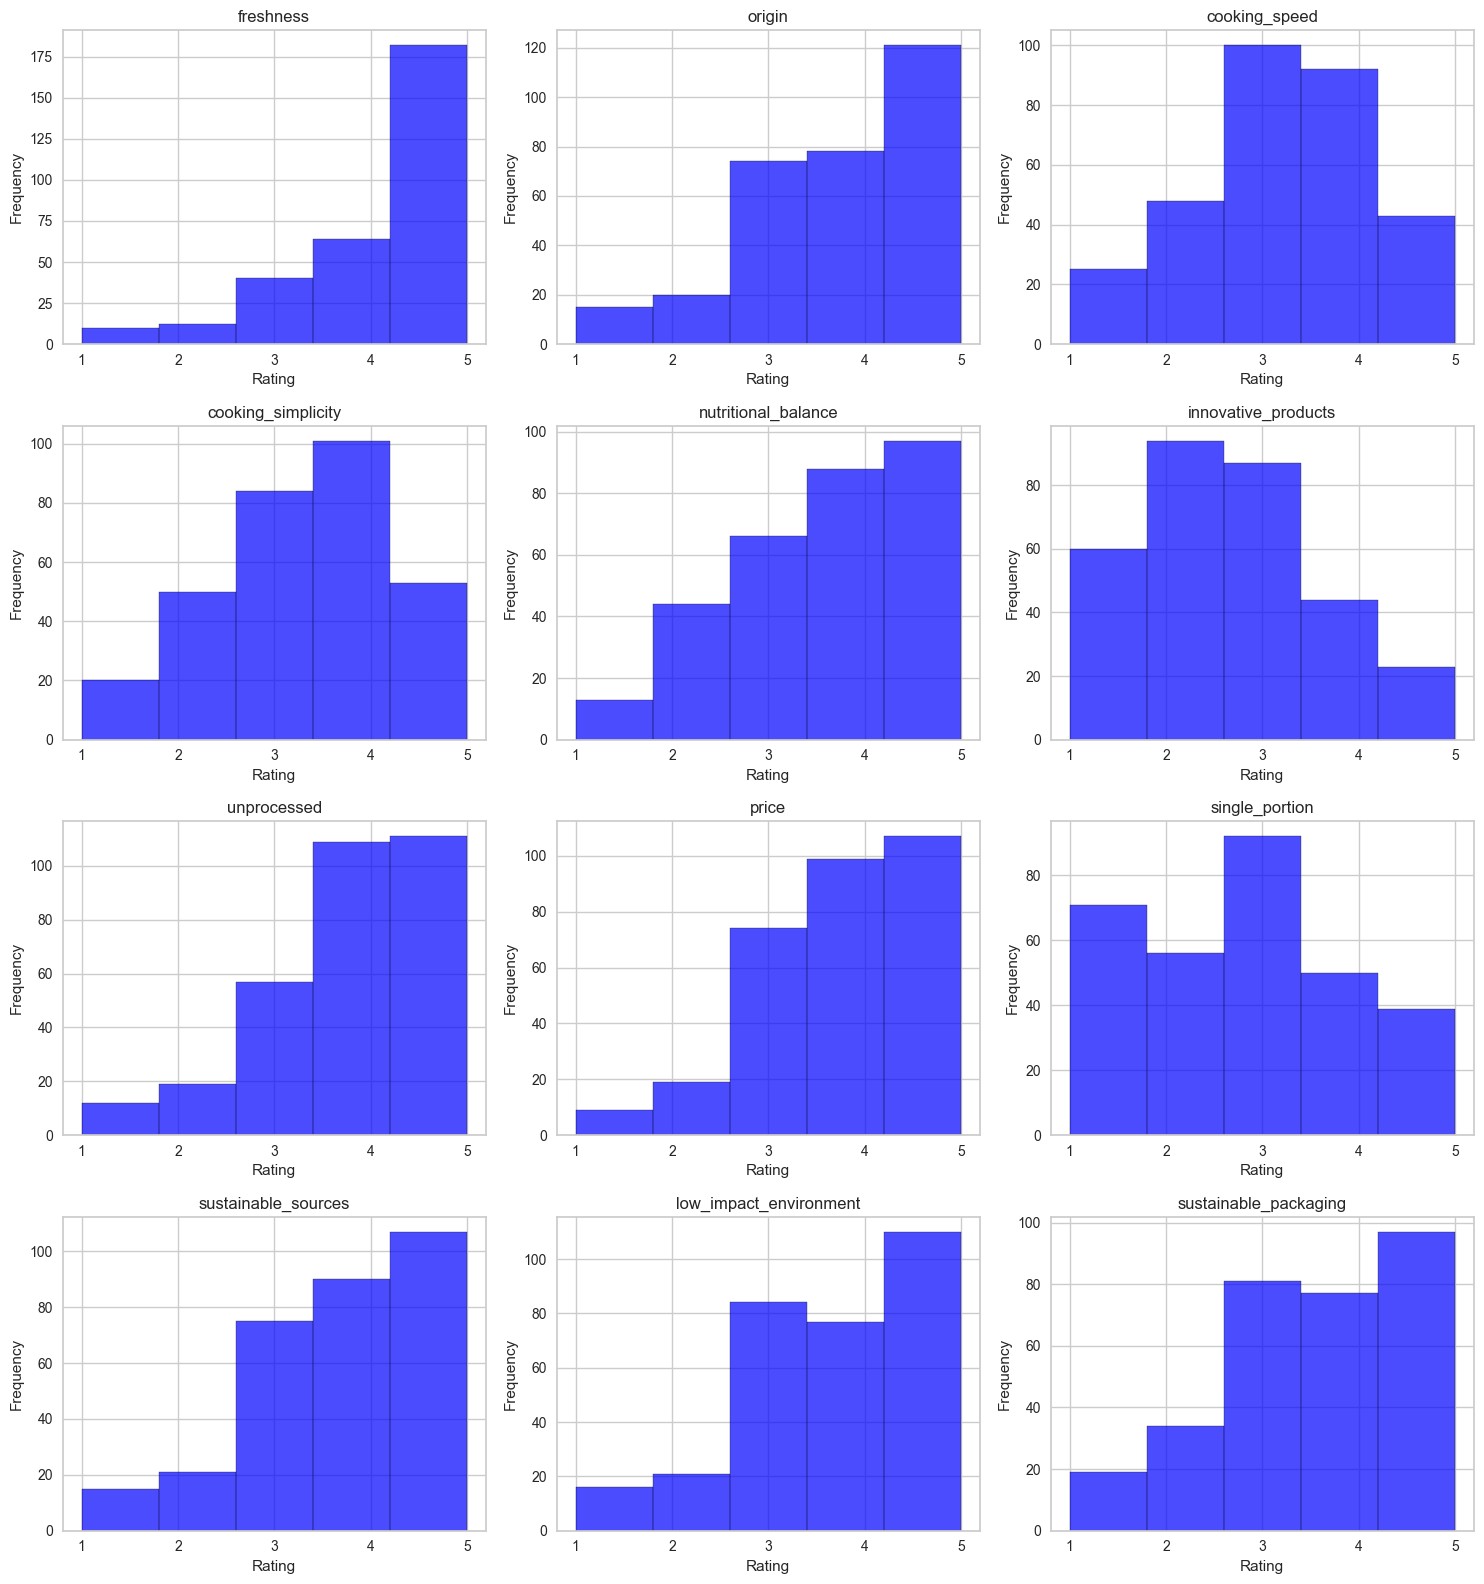

In [11]:
num_variables = len(segmentation_data.columns) 
num_rows = num_variables // 3 + (num_variables % 3 > 0)

fig, axes = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, num_rows * 4), tight_layout=True)
axes = axes.flatten()

for index, column in enumerate(segmentation_data.columns):
    axes[index].hist(segmentation_data[column], bins=5, range=(1, 5), alpha=0.7, color='blue', edgecolor='black')
    axes[index].set_title(column)
    axes[index].set_xlabel('Rating')
    axes[index].set_ylabel('Frequency')
    axes[index].set_xticks(range(1, 6))

for i in range(index + 1, len(axes)):
    axes[i].axis('off')

plt.show()

/var/folders/mx/tjch5_wj6jb11_qwfd_w7ysr0000gn/T/ipykernel_39389/1207386518.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Variable', y='Value', data=df_melted, palette='Set2')


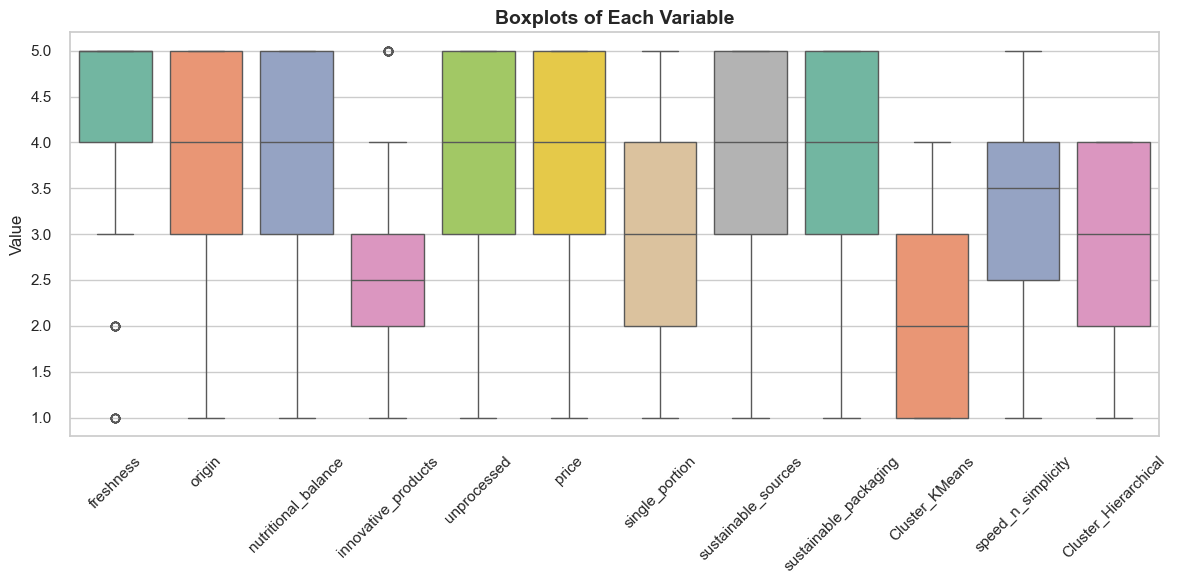

In [50]:
sns.set(style="whitegrid")

df_melted = segmentation_data.melt(var_name='Variable', value_name='Value')

plt.figure(figsize=(12, 6))
sns.boxplot(x='Variable', y='Value', data=df_melted, palette='Set2')
plt.title('Boxplots of Each Variable', fontsize=14, fontweight='bold')
plt.xlabel('')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Last, we checked for **correlation** between attributes:

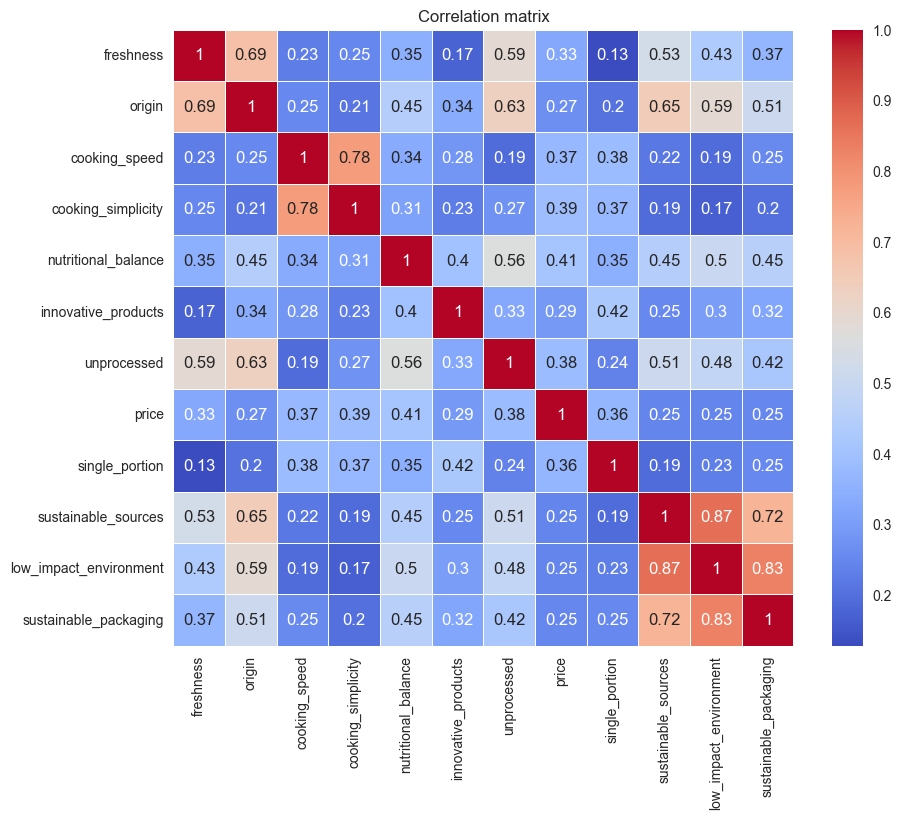

In [12]:
corr_matrix = segmentation_data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation matrix')
plt.show()

-  Even though 'freshness' and 'origin' appear to be correlated (0.69), we decided to keep them both because they have significantly different implications in our decision and labour process
- 'Cooking_speed' and 'cooking_simplicity' have a high correlation (0.78) . Our respondents may have given the same meaning to the variables, therefor we computed the mean and created a new variable column named 'speed_n_simplicity'. 
- In the matrix the last three variables about sustainability are highly correlated. We first drop 'low_impact_environment' and keep 'sustainable_sources' because of their similar implications. 'sustainable_packaging' is also correlated with both variables, but we kept it due to the relevance given nowadays to this factor.  

In [31]:
segmentation_data['speed_n_simplicity'] = segmentation_data[['cooking_speed', 'cooking_simplicity']].mean(axis=1)
segmentation_data.drop(['cooking_speed', 'cooking_simplicity', 'low_impact_environment'], axis=1, inplace=True)  

In [32]:
final_segmentation_data= segmentation_data
final_segmentation_data.head()

,freshness,origin,nutritional_balance,innovative_products,unprocessed,price,single_portion,sustainable_sources,sustainable_packaging,Cluster_KMeans,speed_n_simplicity
respondent_id,,,,,,,,,,,
0,4,3,4,1,2,5,2,5,4,2,2.5
1,5,3,3,2,4,4,4,5,5,4,4.0
2,5,4,5,2,3,4,4,3,3,1,2.5
3,5,3,4,1,5,4,1,3,3,1,2.5
4,5,5,4,2,5,5,5,5,5,4,5.0


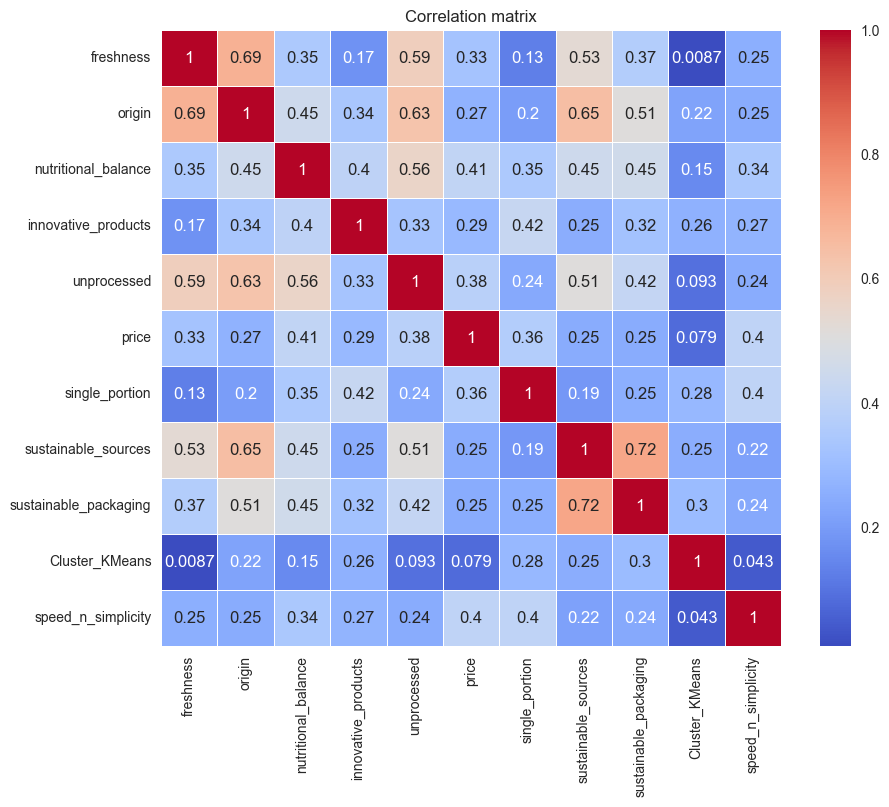

In [33]:
corr_matrix = final_segmentation_data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation matrix')
plt.show()

After correlation adjustment there's a visible improvement in the heatmap. 
We can identify subgroups of variables with a medium correlation, which will be useful in the achievement of our marketing goals (e.g. 'sustainable_sources', 'origin', 'freshness', 'unprocessed').  

### **2.1. PCA**

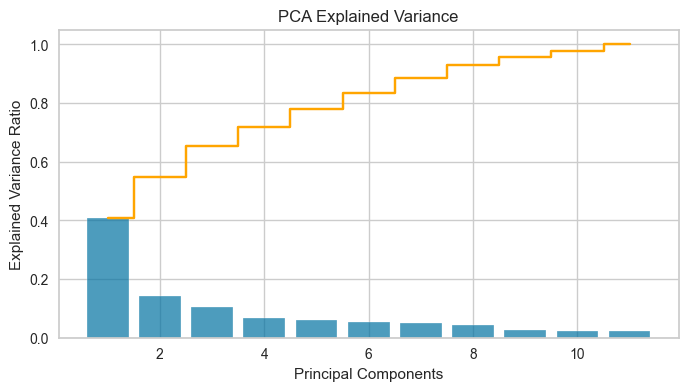

        PC1       PC2       PC3
0 -1.037689 -0.800829  0.228751
1  1.184695  0.513489  1.389347
2 -0.309239  0.459615 -1.377629
3 -1.541763 -1.916214 -1.730859
4  3.352366  0.860186  0.364523


In [35]:
# PCA
pca_full = PCA(n_components=len(segmentation_data.columns))
principal_components_full = pca_full.fit_transform(segmentation_data)
explained_variance = pca_full.explained_variance_ratio_
cumulative_variance = explained_variance.cumsum()

plt.figure(figsize=(8, 4))
plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.7)
plt.step(range(1, len(cumulative_variance) + 1), cumulative_variance, where='mid', color='orange')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.title('PCA Explained Variance')
plt.show()

# PCA with fewer components
pca = PCA(n_components=3)
principal_components = pca.fit_transform(segmentation_data)
pca_df = pd.DataFrame(principal_components, columns=['PC1', 'PC2', 'PC3'])


print(pca_df.head())


Checkng the graph, explained variance is low with few components. Having 95% of explained variance requires:

In [36]:
components_for_95 = np.argmax(cumulative_variance >= 0.95) + 1  # +1 perché gli indici partono da 0

print("Number of components to have 95% of variance explained:", components_for_95)

Number of components to have 95% of variance explained: 9


For the purposes of this project, we aim at maintaining a high level of interpretability. 


Let's proceed and apply some clustering techniques on original data:

### **2.2. K-Means**


#### **2.2.1. Optimal number of clusters**.

We started with K- Means approach. At first, we computed **optimal number of clusters** with Elbow Method and Silhouette Score.

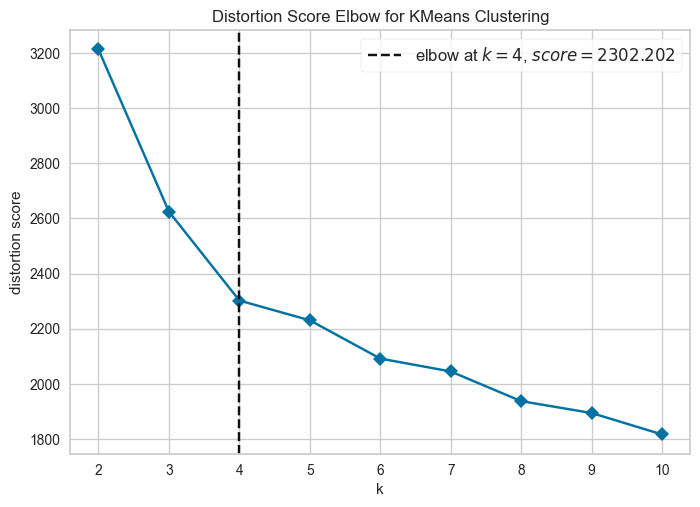

In [37]:
model = KMeans()
visualizer = KElbowVisualizer(model,timings=False)
visualizer.fit(segmentation_data)
visualizer.show();

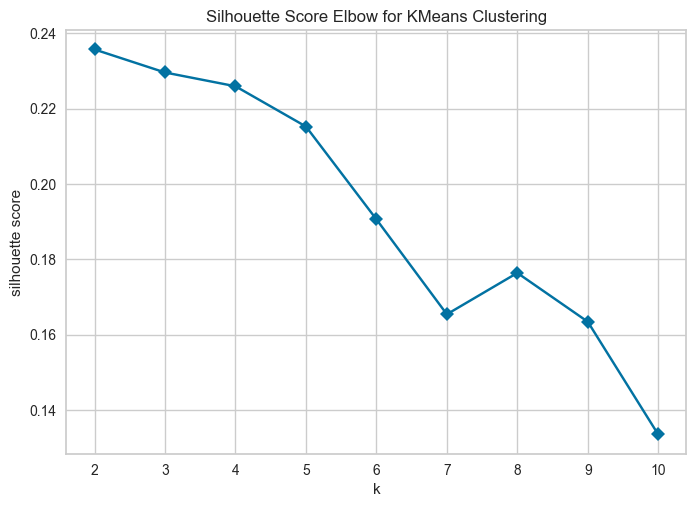

In [41]:
visualizer = KElbowVisualizer(model,metric='silhouette',timings=False, locate_elbow= False)
visualizer.fit(segmentation_data)
visualizer.show();

diciamo che due non va bene perche troppo poco e quindi 4 è migliore, coerente con elbow, siamo tutti felici e contenti

From these two graphs, we can see that optimal number of clusters could be 3 or 4. 


Next, we performed clustering with K=4:

In [42]:
kmeans4 = KMeans(n_clusters = 4, random_state=42)
kmeans4.fit(segmentation_data)
segmentation_data['Cluster_KMeans'] = kmeans4.labels_ +1

segmentation_data

,freshness,origin,nutritional_balance,innovative_products,unprocessed,price,single_portion,sustainable_sources,sustainable_packaging,Cluster_KMeans,speed_n_simplicity
respondent_id,,,,,,,,,,,
0,4,3,4,1,2,5,2,5,4,2,2.5
1,5,3,3,2,4,4,4,5,5,3,4.0
2,5,4,5,2,3,4,4,3,3,1,2.5
3,5,3,4,1,5,4,1,3,3,2,2.5
4,5,5,4,2,5,5,5,5,5,3,5.0
...,...,...,...,...,...,...,...,...,...,...,...
341,5,5,5,5,4,5,4,4,5,3,3.0
342,4,3,1,2,4,5,3,4,4,4,1.0
343,1,1,1,1,1,5,5,1,1,4,5.0


### **2.3. Hierarchical Clustering**

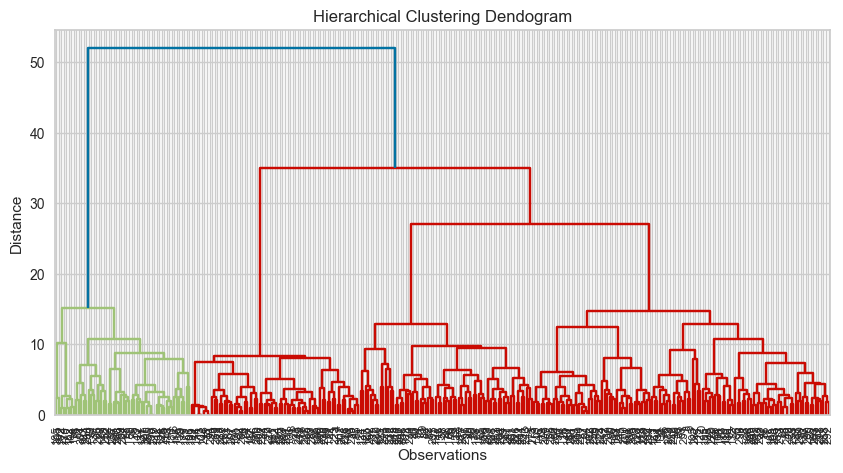

In [48]:
Z = linkage(segmentation_data, method='ward')

plt.figure(figsize=(10, 5))
dendrogram(Z, leaf_rotation=90, leaf_font_size=8)
plt.title('Hierarchical Clustering Dendogram')
plt.xlabel('Observations')
plt.ylabel('Distance')
plt.show()

In [47]:
clusters = fcluster(Z, t=4, criterion='maxclust')

segmentation_data['Cluster_Hierarchical'] = clusters

segmentation_data

,freshness,origin,nutritional_balance,innovative_products,unprocessed,price,single_portion,sustainable_sources,sustainable_packaging,Cluster_KMeans,speed_n_simplicity,Cluster_Hierarchical
respondent_id,,,,,,,,,,,,
0,4,3,4,1,2,5,2,5,4,2,2.5,4
1,5,3,3,2,4,4,4,5,5,3,4.0,4
2,5,4,5,2,3,4,4,3,3,1,2.5,3
3,5,3,4,1,5,4,1,3,3,2,2.5,4
4,5,5,4,2,5,5,5,5,5,3,5.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...
341,5,5,5,5,4,5,4,4,5,3,3.0,4
342,4,3,1,2,4,5,3,4,4,4,1.0,1
343,1,1,1,1,1,5,5,1,1,4,5.0,1


---

### **2.4. Best clustering analysis**


Next, we **combine this information with descriptor data**.
The variables inlcuded are the following:
- **age**: the age range of the respondent.
- **region**: the region in Italy where the respondent lives.
- **location**: the type of area the respondent lives in, such as city centre or suburbs.
- **gender**: the gender with which the respondent identifies.
- **family_members**: the number of people in the respondent's household.
- **job**: the respondent's profession.
- **consumption_frequency**: how often the respondent consumes seafood.
- **fish_type**: the type of seafood consumed most frequently at home.
- **meal_preparation_time**: the average time spent preparing meals each day.
- **grocery_responsibility**: how often the respondent is responsible for grocery shopping.
- **grocery_place**: where the respondent most often purchases seafood.
- **WTP_fish**: the amount the respondent is willing to spend on a high-quality seafood product.

In [57]:
descriptor_data = data.iloc[:,1:16]
descriptor_data = descriptor_data.drop(descriptor_data.columns[[6,7,14]], axis=1)

# rename columns
new_names = { 'Qual è la tua età?': 'age', 
              'In che regione vivi?':'region', 
              'In che zona abiti?': 'location',
       'Con quale genere ti identifichi?' : 'gender',
       'Da quanti componenti è formato il tuo nucleo familiare?' : 'family_members',
       'Qual è la tua professione?': 'job',
        'Quanto spesso consumi prodotti ittici?': 'consumption_frequency',
       'Che tipo di prodotti ittici consumi più frequentemente in casa?': 'fish_type',
       'Quanto tempo dedichi mediamente alla preparazione dei pasti durante la giornata?' : 'meal_preparation_time',
       'Solitamente ti occupi tu della spesa nella tua famiglia?': 'grocery_responsibility',
       'Dove acquisti più spesso i tuoi prodotti ittici? (Puoi selezionare più opzioni) ': 'grocery_place',
       'Quanto saresti disposto a spendere per un prodotto ittico di alta qualità (es. burger di pesce gourmet)?': 'WTP_fish'
    
}

descriptor_data = descriptor_data.rename(columns=new_names)

descriptor_data['Cluster'] = segmentation_data['Cluster']
descriptor_data

,age,region,location,gender,family_members,job,consumption_frequency,fish_type,meal_preparation_time,grocery_responsibility,grocery_place,WTP_fish,Cluster
0,18-25 anni,Lombardia,Centro città,Uomo,4+,Studente,Una volta a settimana,Pesce surgelato,15-30 minuti,Raramente/Mai,Supermercato,Più di 10€,2
1,18-25 anni,Lombardia,Centro città,Uomo,2-3,Lavoratore,Una volta a settimana,Pesce surgelato,15-30 minuti,A volte,Supermercato;Negozi specializzati (es. pescherie),5-8€,4
2,18-25 anni,Veneto,Centro città,Donna,1,Studente,Una volta a settimana,Pesce fresco,30-60 minuti,Sempre/Quasi sempre,Supermercato;Mercati locali,5-8€,1
3,26-35 anni,Lombardia,Periferia città,Donna,2-3,Lavoratore,Una o due volte al mese,Pesce fresco,30-60 minuti,Sempre/Quasi sempre,Supermercato,Non lo comprerei,1
4,60-70 anni,Lombardia,Esterno (es. campagna/costiera/montagna...),Donna,1,Lavoratore,Una o due volte al mese,Pesce surgelato,15-30 minuti,Sempre/Quasi sempre,Supermercato,Meno di 5€,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
341,60-70 anni,Campania,Periferia città,Donna,2-3,Lavoratore,Una o due volte al mese,Pesce surgelato,30-60 minuti,A volte,Supermercato,Non lo comprerei,4
342,18-25 anni,Lombardia,Centro città,Uomo,4+,Studente,Una volta a settimana,Pesce fresco,30-60 minuti,Sempre/Quasi sempre,Supermercato,5-8€,3
343,26-35 anni,Lazio,Centro città,Uomo,1,Lavoratore,Una o due volte al mese,Pesce in scatola,Meno di 15 minuti,Sempre/Quasi sempre,Supermercato,Meno di 5€,3
344,18-25 anni,Lombardia,Centro città,Donna,4+,Studente,Una volta a settimana,Pesce surgelato,15-30 minuti,Sempre/Quasi sempre,Supermercato,Meno di 5€,1


To gain some insights, we created **pie charts of the distribution of variables across each cluster**.

/var/folders/mx/tjch5_wj6jb11_qwfd_w7ysr0000gn/T/ipykernel_36020/2385192693.py:22: UserWarning: Glyph 129315 (\N{ROLLING ON THE FLOOR LAUGHING}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/mx/tjch5_wj6jb11_qwfd_w7ysr0000gn/T/ipykernel_36020/2385192693.py:22: UserWarning: Tight layout not applied. tight_layout cannot make Axes width small enough to accommodate all Axes decorations
  plt.tight_layout()
/Users/lorispalmarin/PycharmProjects/marepiu/.venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 129315 (\N{ROLLING ON THE FLOOR LAUGHING}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


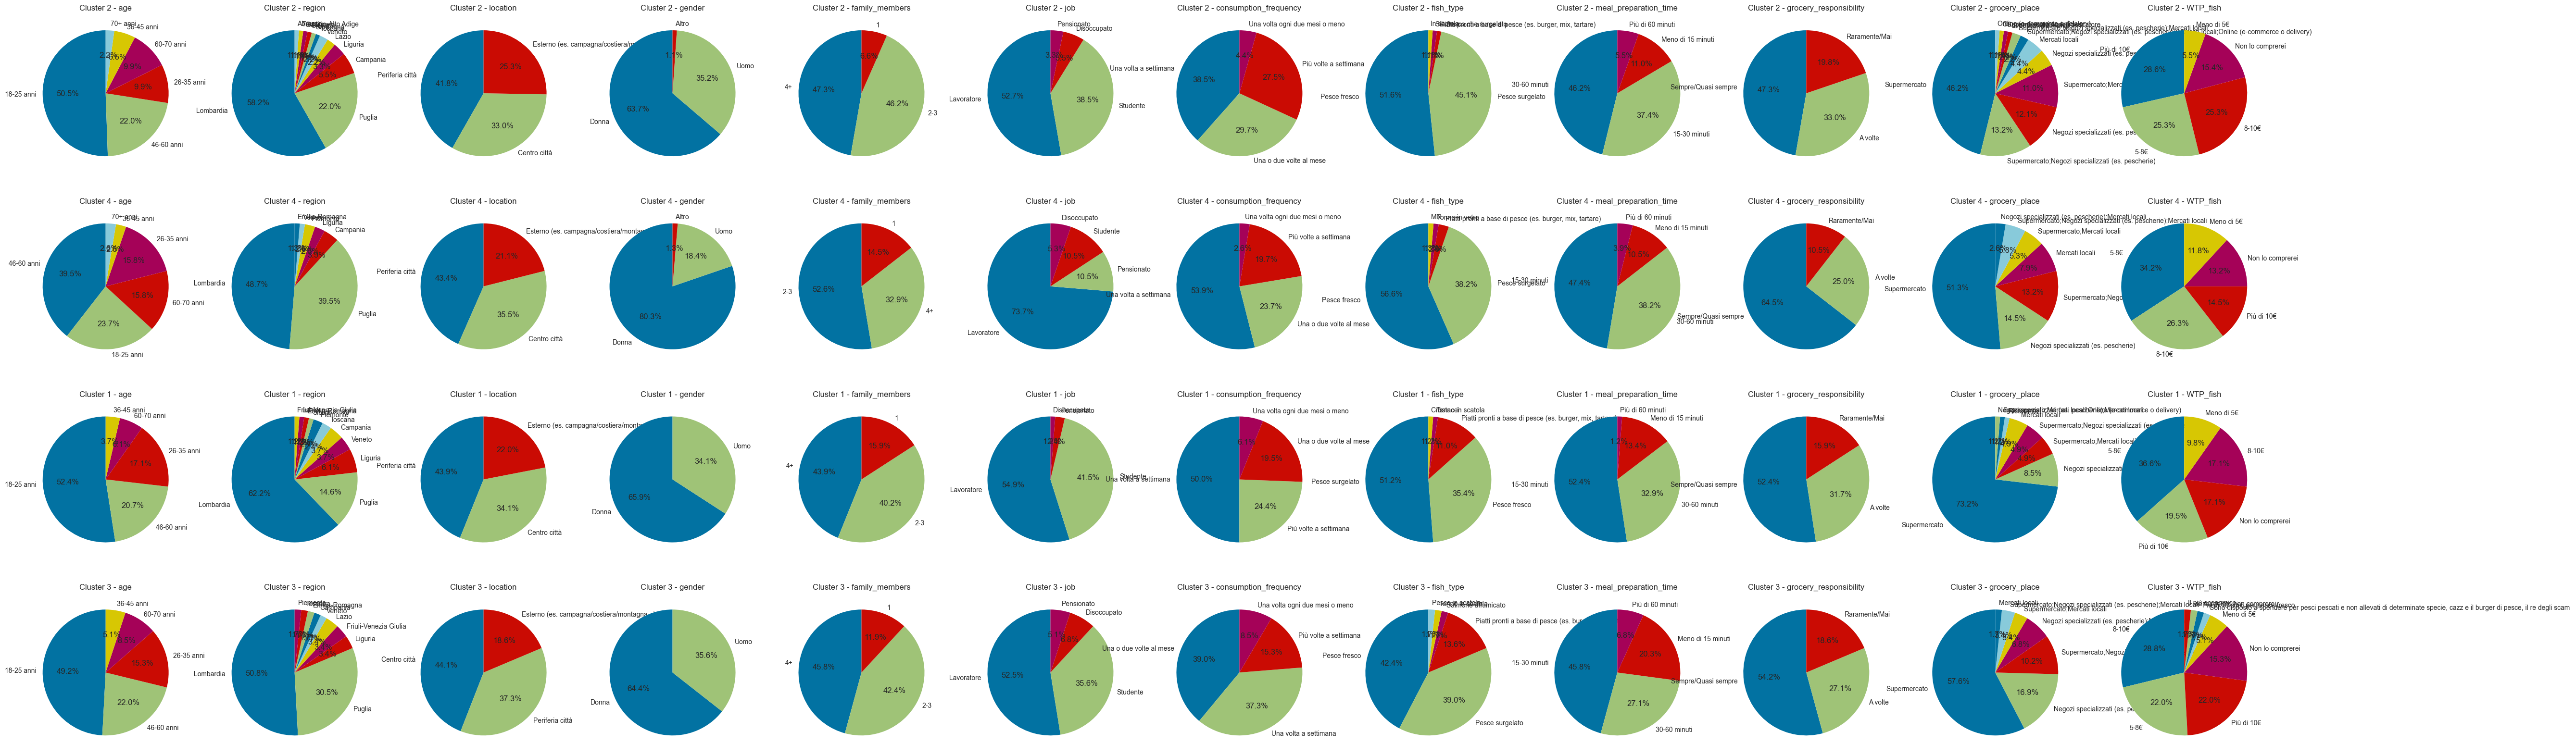

In [51]:
clusters = descriptor_data['Cluster'].unique()
variables = [col for col in descriptor_data.columns if col not in ['Cluster', 'respondent_id']]

num_clusters = len(clusters)
num_variables = len(variables)
fig, axs = plt.subplots(num_clusters, num_variables, figsize=(5 * num_variables, 5 * num_clusters))  # Adjust size as needed

if num_clusters == 1 or num_variables == 1:
    axs = np.array(axs).reshape(num_clusters, num_variables)

# Plot pie charts for each cluster and variable
for i, cluster in enumerate(clusters):
    cluster_data = descriptor_data[descriptor_data['Cluster'] == cluster]
    for j, var in enumerate(variables):
        # Get value counts for the variable in the current cluster
        counts = cluster_data[var].value_counts()
        # Create the pie chart
        ax = axs[i, j] if num_clusters > 1 else axs[j]
        ax.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90)
        ax.set_title(f'Cluster {cluster} - {var}')

plt.tight_layout()
plt.show()

### **2.5. Cluster analysis**